In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")  #Makes plot look nicer

In [12]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()  # Shows first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
print('DataFrame shape:', df.shape)  # How many rows and columns
print('\nInfo:')
df.info()  # Column types, missing values
print('\nMissing values per column:')
print(df.isna().sum())
df.describe(include='all')  # Summary statistics

DataFrame shape: (7043, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperle

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


- There are 7043 customers and 21 features. Target variable Churn has two classes: Yes/No.

In [14]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Churn Distribution Insight

- The dataset shows that churned customers form a smaller proportion compared to non-churned customers, indicating class imbalance.
- This suggests that evaluation metrics such as precision, recall, and F1-score will be more appropriate than accuracy alone.

In [15]:
# 1. Check missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# 2. Fix TotalCharges data type
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# 3. Fill missing values in TotalCharges
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# 4. Drop customerID (not useful for prediction)
df.drop("customerID", axis=1, inplace=True)

# 5. Convert target variable to numeric
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# 6. Final check
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nTarget variable distribution:")
print(df["Churn"].value_counts())

Missing values before cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values after cleaning:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Target 

C:\Users\VRAJPBH\AppData\Local\Temp\ipykernel_5132\4143131697.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


### Data Cleaning Summary

- The `TotalCharges` column contained missing values due to empty strings.
- These values were converted to numeric format and imputed using the median.
- The `customerID` column was removed as it does not contribute to churn prediction.
- The target variable `Churn` was converted into binary format for modeling.


In [16]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Onw-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5634, 30)
Test set shape: (1409, 30)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train baseline model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[927 108]
 [166 208]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



C:\Users\VRAJPBH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X_encoded = df_encoded.drop("Churn", axis=1)
y_encoded = df_encoded["Churn"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)



Train–test split was performed with stratification to preserve the original churn distribution.

In [19]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Train the model with class_weight to handle imbalance
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation the model
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

0.8419979849647368


C:\Users\VRAJPBH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Baseline Model Results (Logistic Regression)

- Logistic Regression was used as a baseline model.
- Class imbalance was handled using class weighting.
- The model performance was evaluated using precision, recall, F1-score, and ROC–AUC.
- Recall is prioritized since identifying churned customers is more important than overall accuracy.


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

0.8208879072050428


<Axes: title={'center': 'Top 10 Important Features'}>

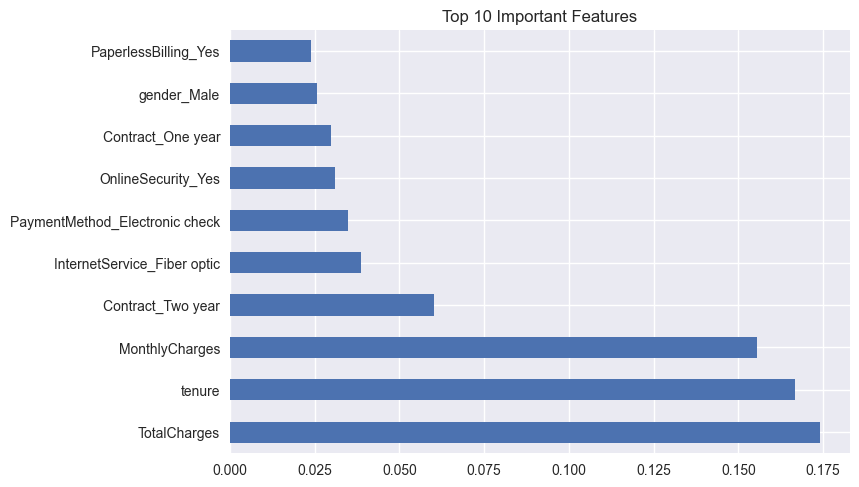

In [20]:
# Import & train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

rf_clf.fit(X_train, y_train)

# Make predictions
rf_pred = rf_clf.predict(X_test)
rf_proba = rf_clf.predict_proba(X_test)[:, 1]

# Evaluate Random Forest model
print(classification_report(y_test, rf_pred))
print(roc_auc_score(y_test, rf_proba))
confusion_matrix(y_test, rf_pred)

# optional: Feature importance from Random Forest
feature_importance = pd.Series(
    rf_clf.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)
feature_importance.head(10).plot(kind="barh", title="Top 10 Important Features")


### Feature Importance Insights

- Contract type, tenure, and monthly charges are among the most influential features.
- Customers on month-to-month contracts show a higher likelihood of churn.
- Short-tenure customers are more likely to churn, indicating the importance of early engagement.


## Model Comparison Summary

Two models were evaluated for customer churn prediction:

- **Logistic Regression (Baseline):**
  - Simple and interpretable baseline model
  - Handled class imbalance using class weighting
  - Provided reasonable recall for churned customers

- **Random Forest Classifier:**
  - Achieved higher ROC–AUC compared to Logistic Regression
  - Captured non-linear relationships between features
  - Identified key churn drivers such as contract type, tenure, and monthly charges

Overall, the Random Forest model performed better and was selected as the final model.


## Business Recommendations

- Customers on month-to-month contracts show higher churn risk and should be targeted with long-term contract incentives.
- New customers with low tenure require early engagement strategies to reduce churn.
- High monthly charges are associated with higher churn, suggesting the need for personalized pricing or bundled offers.
- Predictive churn models can be used to proactively identify at-risk customers and reduce revenue loss.
